#### [ 개발 주제 : 길이에 따른 생선 무게 예측 모델 ]
- 데이터셋 : fish.csv
	* 피처/특성/데이터 : 길이 Length 컬럼
	* 타겟/정답/레이블 : 무게 Weight 컬럼
- 학습종류 : 지도학습 - 회귀(Regression)
- 알고리즘 : 데이터셋 분석 후 결정

[1] 모듈로딩 및 데이터 준비 <hr>

In [3]:
## [1-1] 모듈로딩 - 데이터 분석용
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## [1-2] 데이터 준비
DATA_FILE ='../data/fish.csv'

In [5]:
## - 데이터 로딩
fishDF = pd.read_csv(DATA_FILE, skiprows=73, header=None, skipfooter=31, 
					 usecols=[1,2], engine='python')
fishDF

,1,2
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4
5,100.0,18.0
6,78.0,18.7
7,80.0,19.0
8,85.0,19.6
9,85.0,20.0


[2] 데이터 분석 - 탐색적 분석 <hr>

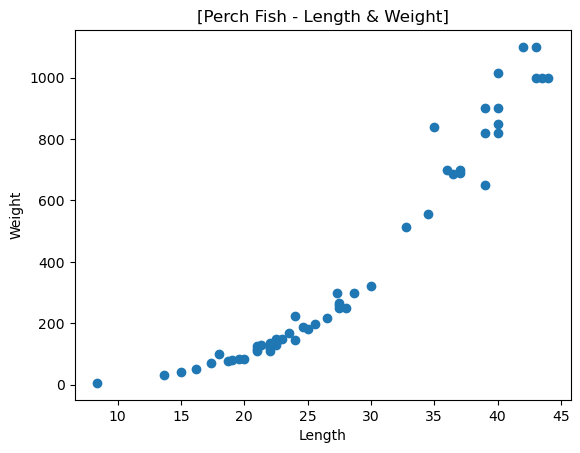

In [6]:
## - 무게와 길이의 분포 시각화
plt.plot(fishDF[2], fishDF[1], 'o')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[Perch Fish - Length & Weight]')
plt.show()

In [7]:
# - 길이와 무게는 선형의 분포
# - 길이에 따른 무게를 예측하기 위한 알고리즘으로 선형 모델 선정
# - 학습 알고리즘 ==> LinearRegression 진행

[3] 학습 진행 <hr>

In [8]:
## 학습관련 모듈로딩
from sklearn.linear_model import LinearRegression						## ML 알고리즘 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error		## 성능평가 관련 모듈
from sklearn.model_selection import train_test_split					## 데이터셋 분리 관련 모듈

In [ ]:
## [3-1] 데이터셋 준비 => 학습용, 검증용 ,테스트용
## - 학습용   : 모델 학습 즉, 규칙과 패턴 찾기 위해 사용되는 데이터셋
## - 검증용   : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
## - 테스트용 : 학습 완료 후 검사용 데이터셋

## - 전체 데이터셋 => 학습용 : 테스트용 = 70:30 또는 80:20
featureDF = fishDF[[2]]
targetSR = fishDF[1]
print(f'featureDF => {featureDF.ndim}D targetSR => {targetSR.ndim}D')

featureDF => 2D targetSR => 1D


In [ ]:
# 학습용 : 테스트용 = 80:20
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
													targetSR, 
													test_size=0.2,
													random_state=10)

print(f'X_train => {X_train.shape}, X_test => {X_test.shape}')
print(f'y_train => {y_train.shape}, y_test => {y_test.shape}')

X_train => (44, 1), X_test => (12, 1)
y_train => (44,). y_test => (12,)


In [11]:
# 학습용 : 테스트용 = 80:20
X_train, X_val, y_train, y_val = train_test_split(	X_train, 
													y_train, 
													test_size=0.2,
													random_state=10)

print(f'X_train => {X_train.shape},  X_val => {X_val.shape}, X_test => {X_test.shape}')
print(f'y_train => {y_train.shape}, y_val => {y_val.shape}, y_test => {y_test.shape}')

X_train => (35, 1),  X_val => (9, 1), X_test => (12, 1)
y_train => (35,), y_val => (9,), y_test => (12,)


In [12]:
## [3-2] 학습 진행 => 알고리즘객체 생성
fishModel = LinearRegression()

In [13]:
## [3-3] 학습 진행 => 학습용 데이터셋 사용
fishModel.fit(X_train, y_train)

LinearRegression()

In [14]:
## -> 모델 파라미터 확인
print(f'coef_ : {fishModel.coef_}, intercept_ : {fishModel.intercept_}')

coef_ : [36.15284269], intercept_ : -621.066087300162


[4] 학습평가 <hr>
- 성능평가 : 모델이 적합한 모델인가를 평가
- 손실계산 : 잔차/오차 발생 정도 확인

In [15]:
## [4-1] 성능평가 : 모델 적합도 => 검증용 데이터셋
score = fishModel.score(X_val, y_val)

print(f'모델 성능평가 점수: {score}')

모델 성능평가 점수: 0.9648131883305688


In [16]:
## [4-2] 손실계산 : 검증용 데이터셋으로 예측값 추출 ==> 손실계산
pre_y = fishModel.predict(X_val)

mse = mean_squared_error(y_val, pre_y)
mae = mean_absolute_error(y_val, pre_y)

print(f'mse : {mse}, mae : {mae}')

mse : 5274.139037788728, mae : 50.553743091196225


[5] 예측 서비스 <hr>

In [17]:
## 테스트용 데이터셋으로 진행
pre_y = fishModel.predict(X_test)

print(f'예측 길이 : {pre_y}')

예측 길이 : [365.90651812 -35.39003573 373.13708666 282.75497993 199.60344175
 174.29645186 788.89477758 -78.77344696 228.5257159  268.29384286
 391.213508   564.74715291]
